In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [10]:
dataset=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')

In [11]:
dataset.head(10)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
5,AssocProf,B,6,6,Male,97000
6,Prof,B,30,23,Male,175000
7,Prof,B,45,45,Male,147765
8,Prof,B,21,20,Male,119250
9,Prof,B,18,18,Female,129000


In [12]:
dataset.shape

(397, 6)

In [13]:
dataset.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [14]:
dataset.isnull().any()

rank             False
discipline       False
yrs.since.phd    False
yrs.service      False
sex              False
salary           False
dtype: bool

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

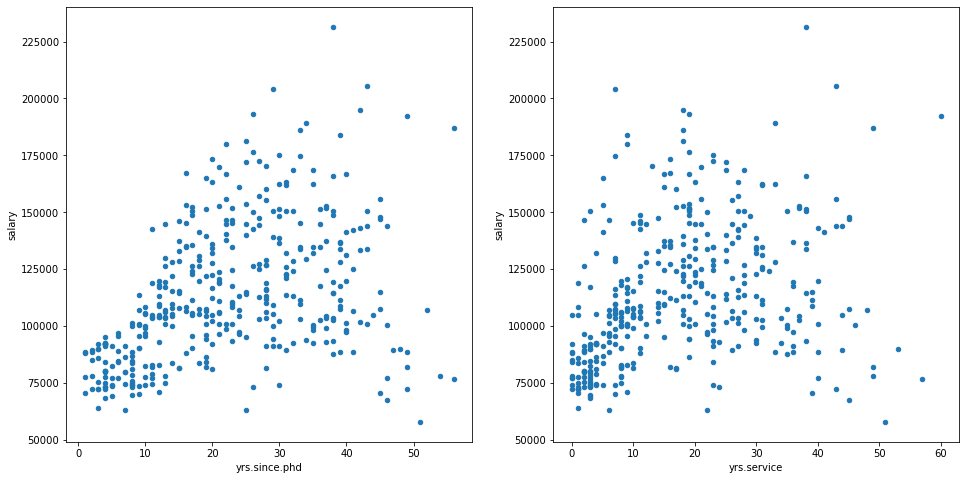

In [16]:
fig,axs=plt.subplots(1,2)
#dataset.plot(kind='scatter',x='rank',y='salary',ax=axs[0],figsize=(16,8))
#dataset.plot(kind='scatter',x='discipline',y='salary',ax=axs[1])
dataset.plot(kind='scatter',x='yrs.since.phd',y='salary',ax=axs[0],figsize=(16,8))
dataset.plot(kind='scatter',x='yrs.service',y='salary',ax=axs[1])
#dataset.plot(kind='scatter',x='sex',y='salary',ax=axs[4])

In [48]:
x=dataset.iloc[:,2].values
x

array([19, 20,  4, 45, 40,  6, 30, 45, 21, 18, 12,  7,  1,  2, 20, 12, 19,
       38, 37, 39, 31, 36, 34, 24, 13, 21, 35,  5, 11, 12, 20,  7, 13,  4,
        4,  5, 22,  7, 41,  9, 23, 23, 40, 38, 19, 25, 40, 23, 25,  1, 28,
       12, 11, 16, 12, 14, 23,  9, 10,  8,  9,  3, 33, 11,  4,  9, 22, 35,
       17, 28, 17, 45, 29, 35, 28,  8, 17, 26,  3,  6, 43, 17, 22,  6, 17,
       15, 37,  2, 25,  9, 10, 10, 10, 38, 21,  4, 17, 13, 30, 41, 42, 28,
       16, 20, 18, 31, 11, 10, 15, 40, 20, 19,  3, 37, 12, 21, 30, 39,  4,
        5, 14, 32, 24, 25, 24, 54, 28,  2, 32,  4, 11, 56, 10,  3, 35, 20,
       16, 17, 10, 21, 14, 15, 19,  3, 27, 28,  4, 27, 36,  4, 14,  4, 21,
       12,  4, 21, 12,  1,  6, 15,  2, 26, 22,  3,  1, 21, 16, 18,  8, 25,
        5, 19, 37, 20, 17, 28, 10, 13, 27,  3, 11, 18,  8, 26, 23, 33, 13,
       18, 28, 25, 22, 43, 19, 19, 48,  9,  4,  4, 34, 38,  4, 40, 28, 17,
       19, 21, 35, 18,  7, 20,  4, 39, 15, 26, 11, 16, 15, 29, 14, 13, 21,
       23, 13, 34, 38, 20

In [49]:
y=dataset.iloc[:,5].values
y

array([139750, 173200,  79750, 115000, 141500,  97000, 175000, 147765,
       119250, 129000, 119800,  79800,  77700,  78000, 104800, 117150,
       101000, 103450, 124750, 137000,  89565, 102580,  93904, 113068,
        74830, 106294, 134885,  82379,  77000, 118223, 132261,  79916,
       117256,  80225,  80225,  77000, 155750,  86373, 125196, 100938,
       146500,  93418, 101299, 231545,  94384, 114778,  98193, 151768,
       140096,  70768, 126621, 108875,  74692, 106639, 103760,  83900,
       117704,  90215, 100135,  75044,  90304,  75243, 109785, 103613,
        68404, 100522, 101000,  99418, 111512,  91412, 126320, 146856,
       100131,  92391, 113398,  73266, 150480, 193000,  86100,  84240,
       150743, 135585, 144640,  88825, 122960, 132825, 152708,  88400,
       172272, 107008,  97032, 105128, 105631, 166024, 123683,  84000,
        95611, 129676, 102235, 106689, 133217, 126933, 153303, 127512,
        83850, 113543,  82099,  82600,  81500, 131205, 112429,  82100,
      

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=1001)

In [51]:
x_test.size

133

In [52]:
LR = LinearRegression()

In [53]:
LR.fit(x_train.reshape(-1, 1),y_train)

LinearRegression()

In [54]:
y_pred_lr=LR.predict(x_test.reshape(-1, 1))
y_pred_lr

array([133304.05424176,  96303.30110315, 122593.30991216, 114803.67767246,
        96303.30110315, 120645.90185224, 101171.82125297, 126488.12603202,
       100198.117223  ,  96303.30110315, 130382.94215187, 126488.12603202,
       136225.16633165, 100198.117223  , 137198.87036161, 102145.52528293,
        96303.30110315, 104092.93334286, 100198.117223  ,  96303.30110315,
       117724.78976235, 136225.16633165, 107987.74946271, 113829.97364249,
       119672.19782227, 122593.30991216, 107014.04543275, 119672.19782227,
       106040.34140278,  95329.59707319, 137198.87036161, 106040.34140278,
       129409.23812191, 111882.56558256, 107987.74946271, 129409.23812191,
       106040.34140278, 104092.93334286, 114803.67767246, 105066.63737282,
       103119.22931289, 107014.04543275, 101171.82125297, 117724.78976235,
       114803.67767246, 104092.93334286, 109935.15752264, 105066.63737282,
       124540.71797209, 105066.63737282, 118698.49379231, 104092.93334286,
       106040.34140278,  

In [55]:
y_test

array([101738,  92700, 126000, 108200,  73000, 139219,  90215, 100351,
        73266,  80225, 137000, 168635, 146856,  83600, 144050,  99247,
        92000,  71065,  84500,  74856, 150000, 115000, 167284,  98510,
       103649, 132000, 137167, 160400,  83900,  89942, 100600, 109650,
        87800, 102000, 135027, 231545, 104350, 117150, 117704, 103700,
        83001, 146000, 100938, 176500, 124714, 108875, 126300, 126431,
       186023, 107150, 103275,  93000, 128148,  91000,  75996, 106231,
        93418, 126933,  75044,  96200, 153303, 111751, 104800, 113278,
        67559, 105631, 113543, 117555, 145098,  74000, 114596,  94350,
       114500,  77000, 101000, 151445,  70768, 108413, 122500,  72500,
        74500, 112696, 135585, 110515, 150743, 145000,  76840, 144640,
       134778, 113068, 146800, 152500,  88650, 103613,  95329,  73000,
       101100,  97262, 119015, 140300, 166605, 145350, 107008, 109954,
       170000,  91412, 100522,  73300, 101299,  69700, 126320, 134690,
      

In [56]:
diff_lr = y_test-y_pred_lr

In [57]:
res_diff=pd.concat([pd.Series(y_pred_lr),pd.Series(y_test),pd.Series(diff_lr)],axis=1)
res_diff.columns=['Prediction','Original data','Difference']
res_diff

,Prediction,Original data,Difference
0,133304.054242,101738,-31566.054242
1,96303.301103,92700,-3603.301103
2,122593.309912,126000,3406.690088
3,114803.677672,108200,-6603.677672
4,96303.301103,73000,-23303.301103
...,...,...,...
128,110908.861553,94384,-16524.861553
129,97277.005133,77000,-20277.005133
130,107014.045433,132825,25810.954567
131,95329.597073,75243,-20086.597073


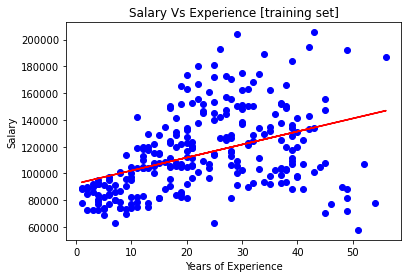

In [58]:
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_train,LR.predict(x_train.reshape(-1, 1)),color='red')
plt.title("Salary Vs Experience [training set]")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()


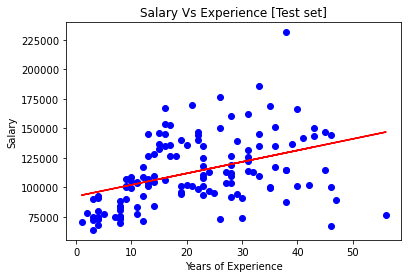

In [59]:
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_train,LR.predict(x_train.reshape(-1, 1)),color='red')
plt.title("Salary Vs Experience [Test set]")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

In [60]:
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred_lr))
rmse

26732.580458041542

In [61]:
r2=metrics.r2_score(y_test,y_pred_lr)
r2

0.1796399633197462

In [65]:
LR.predict([[6]])

array([98250.70916308])